In [6]:
import os
import openpyxl

# Specify the directory where you want to create the Excel files
directory = 'E:\Mostafa\Enhanced Model\Enhanced Model\Results'

# Ensure the directory exists; create it if not
if not os.path.exists(directory):
    os.makedirs(directory)

# Create 475 Excel files
for i in range(476):
    filename = f'instance_{i}.xlsx'
    filepath = os.path.join(directory, filename)

    # Create a new workbook
    wb = openpyxl.Workbook()
    
    # Access the specified sheet by name (Sheet in this case)
    sheet = wb['Sheet']

    # Add the columns with specified formulas to the first row
    sheet['A1'] = "TotalProductionTime"
    sheet['B1'] = "NumberOfAcceptedOrders"
    sheet['C1'] = "Gap_Model_MaximizeOrder"
    sheet['D1'] = "MaximizeNumberOfAcceptedOrders_SolutionTime"
    sheet['E1'] = "MinimizeTime_SolutionTime"
    sheet['F1'] = "NumberOfOrders"
    sheet['G1'] = "NumberOfProductionLines"
    sheet['H1'] = "NumberOfWeeks"
    sheet['I1'] = "PersonnelAvailable"
    sheet['J1'] = "MachineEligibility"
    sheet['K1'] = "UntilizedWeeklyTime"
    sheet['L1'] = "TotalTimeSeparate"
    sheet['M1'] = "TotalChangeOverTime"
    sheet['N1'] = "TotalProcessingTime"
    sheet['O1'] = "MinimizeModel_Constraints"
    sheet['P1'] = "MaximizeModel_Constraints"
    sheet['Q1'] = "MaximizeModel_Variables"
    sheet['R1'] = "MinimizeModel_Variables"
    sheet['S1'] = "MaximizeModel_IntVariables"
    sheet['T1'] = "MinimizeModel_IntVariables"
    sheet['U1'] = "MinimizeModel_Status"
    sheet['V1'] = "MaximizeModel_Status"
    sheet['W1'] = "Gap_Model_MinimizeTime"

    # Save the workbook to the specified filepath
    wb.save(filepath)


In [3]:
import openpyxl
import os

directory = 'C:\\Users\\Hezardastan\\Google Drive\\Enhanced Model\\data'

# Create a new workbook to store the combined results
result_wb = openpyxl.Workbook()
result_ws = result_wb.active

# Add headers to the result sheet
result_ws.append(['D Value', 'G Value', 'Source File'])

for i in range(476):
    filename = f'Scheduling_Instance_{i}.xlsx'
    filepath = os.path.join(directory, filename)

    try:
        # Open the workbook
        source_wb = openpyxl.load_workbook(filepath)

        # Select the 'Sets' sheet
        source_ws = source_wb['Sets']

        # Read values from cells D2 and G2
        d_value = source_ws['D2'].value
        g_value = source_ws['G2'].value

        source_ws = source_wb['Instance Info']
        instance_number = source_ws['B2'].value
        Number_of_Jobs = source_ws['B3'].value
        Number_of_Machines = source_ws['B4'].value
        Number_of_Weeks = source_ws['B5'].value
        Number_of_Personnel = source_ws['B6'].value
        Machine_Eligibility = source_ws['B13'].value
        Time_density = source_ws['B8'].value
        Mean_time = source_ws['B10'].value

        # Add values to the result sheet
        result_ws.append([d_value, g_value,instance_number, Number_of_Jobs, Number_of_Machines, Number_of_Weeks, Number_of_Personnel,Time_density,Machine_Eligibility, Mean_time,  filename])
        

        # Close the source workbook
        source_wb.close()
    except FileNotFoundError:
        print(f"File not found: {filepath}")

# Save the result workbook
result_wb.save('combined_results_1.xlsx')


In [1]:
import os
import pandas as pd

directory = 'E:\Mostafa\Enhanced Model\Enhanced Model\Results'

# Create an empty list to store DataFrames
dfs = []
filename = 'instance_0.xlsx'
filepath = os.path.join(directory, filename)
dfs = pd.read_excel(filepath, nrows=0, usecols="A:W")

# Iterate for 2 Machines
for i in range(0, 60):
    filename = f'instance_{i}.xlsx'
    filepath = os.path.join(directory, filename)
    
    # Read the Excel file and select the entire second row from columns A to W
    df = pd.read_excel(filepath, header=None, skiprows=1, usecols="A:W")
    
    # Append the entire second row DataFrame to the list
    dfs.append(df.iloc[0])

# Iterate for 3 Machines
for i in range(72, 138):
    filename = f'instance_{i}.xlsx'
    filepath = os.path.join(directory, filename)
    
    # Read the Excel file and select the entire second row from columns A to W
    df = pd.read_excel(filepath, header=None, skiprows=1, usecols="A:W")
    
    # Append the entire second row DataFrame to the list
    dfs.append(df.iloc[0])

# Iterate for 4 Machines
for i in range(168, 216):
    filename = f'instance_{i}.xlsx'
    filepath = os.path.join(directory, filename)
    
    # Read the Excel file and select the entire second row from columns A to W
    df = pd.read_excel(filepath, header=None, skiprows=1, usecols="A:W")
    
    # Append the entire second row DataFrame to the list
    dfs.append(df.iloc[0])

# Iterate for 5 Machines
for i in range(232, 280):
    filename = f'instance_{i}.xlsx'
    filepath = os.path.join(directory, filename)
    
    # Read the Excel file and select the entire second row from columns A to W
    df = pd.read_excel(filepath, header=None, skiprows=1, usecols="A:W")
    
    # Append the entire second row DataFrame to the list
    dfs.append(df.iloc[0])

# Iterate for 6 Machines
for i in range(304, 352):
    filename = f'instance_{i}.xlsx'
    filepath = os.path.join(directory, filename)
    
    # Read the Excel file and select the entire second row from columns A to W
    df = pd.read_excel(filepath, header=None, skiprows=1, usecols="A:W")
    
    # Append the entire second row DataFrame to the list
    dfs.append(df.iloc[0])

for i in range(368, 384):
    filename = f'instance_{i}.xlsx'
    filepath = os.path.join(directory, filename)
    
    # Read the Excel file and select the entire second row from columns A to W
    df = pd.read_excel(filepath, header=None, skiprows=1, usecols="A:W")
    
    # Append the entire second row DataFrame to the list
    dfs.append(df.iloc[0])

for i in range(400, 420):
    filename = f'instance_{i}.xlsx'
    filepath = os.path.join(directory, filename)

    # Read the Excel file and select the entire second row from columns A to W
    df = pd.read_excel(filepath, header=None, skiprows=1, usecols="A:W")

    # Append the entire second row DataFrame to the list
    dfs.append(df.iloc[0])
# 9 Machines
for i in range(440, 440):
    filename = f'instance_{i}.xlsx'
    filepath = os.path.join(directory, filename)

    # Read the Excel file and select the entire second row from columns A to W
    df = pd.read_excel(filepath, header=None, skiprows=1, usecols="A:W")

    # Append the entire second row DataFrame to the list
    dfs.append(df.iloc[0])
# 10 Machines
for i in range(460, 460):
    filename = f'instance_{i}.xlsx'
    filepath = os.path.join(directory, filename)

    # Read the Excel file and select the entire second row from columns A to W
    df = pd.read_excel(filepath, header=None, skiprows=1, usecols="A:W")

    # Append the entire second row DataFrame to the list
    dfs.append(df.iloc[0])    

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(dfs, axis=1)

# Transpose the DataFrame so that each instance becomes a row
combined_df = combined_df.T

# Save the combined DataFrame to a new Excel file
combined_df.to_excel('combined_aimms_current_results.xlsx', index=False)


In [ ]:
import os
import pandas as pd

directory = 'E:\Mostafa\Enhanced Model\Enhanced Model\Results'

# Create an empty list to store DataFrames
dfs = []
filename = 'instance_0.xlsx'
filepath = os.path.join(directory, filename)
dfs = pd.read_excel(filepath, nrows=0, usecols="A:W")

# Iterate for 2 Machines
for i in range(0, 60):
    filename = f'instance_{i}.xlsx'
    filepath = os.path.join(directory, filename)
    
    # Read the Excel file and select the entire second row from columns A to W
    df = pd.read_excel(filepath, header=None, skiprows=1, usecols="A:W")
    
    # Append the entire second row DataFrame to the list
    dfs.append(df.iloc[0])

# Iterate for 3 Machines
for i in range(72, 138):
    filename = f'instance_{i}.xlsx'
    filepath = os.path.join(directory, filename)
    
    # Read the Excel file and select the entire second row from columns A to W
    df = pd.read_excel(filepath, header=None, skiprows=1, usecols="A:W")
    
    # Append the entire second row DataFrame to the list
    dfs.append(df.iloc[0])

# Iterate for 4 Machines
for i in range(168, 216):
    filename = f'instance_{i}.xlsx'
    filepath = os.path.join(directory, filename)
    
    # Read the Excel file and select the entire second row from columns A to W
    df = pd.read_excel(filepath, header=None, skiprows=1, usecols="A:W")
    
    # Append the entire second row DataFrame to the list
    dfs.append(df.iloc[0])

# Iterate for 5 Machines
for i in range(232, 280):
    filename = f'instance_{i}.xlsx'
    filepath = os.path.join(directory, filename)
    
    # Read the Excel file and select the entire second row from columns A to W
    df = pd.read_excel(filepath, header=None, skiprows=1, usecols="A:W")
    
    # Append the entire second row DataFrame to the list
    dfs.append(df.iloc[0])

# Iterate for 6 Machines
for i in range(304, 352):
    filename = f'instance_{i}.xlsx'
    filepath = os.path.join(directory, filename)
    
    # Read the Excel file and select the entire second row from columns A to W
    df = pd.read_excel(filepath, header=None, skiprows=1, usecols="A:W")
    
    # Append the entire second row DataFrame to the list
    dfs.append(df.iloc[0])

for i in range(368, 384):
    filename = f'instance_{i}.xlsx'
    filepath = os.path.join(directory, filename)
    
    # Read the Excel file and select the entire second row from columns A to W
    df = pd.read_excel(filepath, header=None, skiprows=1, usecols="A:W")
    
    # Append the entire second row DataFrame to the list
    dfs.append(df.iloc[0])

for i in range(400, 420):
    filename = f'instance_{i}.xlsx'
    filepath = os.path.join(directory, filename)

    # Read the Excel file and select the entire second row from columns A to W
    df = pd.read_excel(filepath, header=None, skiprows=1, usecols="A:W")

    # Append the entire second row DataFrame to the list
    dfs.append(df.iloc[0])
# 9 Machines
for i in range(440, 440):
    filename = f'instance_{i}.xlsx'
    filepath = os.path.join(directory, filename)

    # Read the Excel file and select the entire second row from columns A to W
    df = pd.read_excel(filepath, header=None, skiprows=1, usecols="A:W")

    # Append the entire second row DataFrame to the list
    dfs.append(df.iloc[0])
# 10 Machines
for i in range(460, 460):
    filename = f'instance_{i}.xlsx'
    filepath = os.path.join(directory, filename)

    # Read the Excel file and select the entire second row from columns A to W
    df = pd.read_excel(filepath, header=None, skiprows=1, usecols="A:W")

    # Append the entire second row DataFrame to the list
    dfs.append(df.iloc[0])    

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(dfs, axis=1)

# Transpose the DataFrame so that each instance becomes a row
combined_df = combined_df.T

# Save the combined DataFrame to a new Excel file
combined_df.to_excel('combined_aimms_current_results.xlsx', index=False)


In [33]:
combined_aimms_results = pd.read_excel('combined_aimms_results.xlsx')
combined_aimms_results

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1751,50,0.000000,0.734,28.531,51,3,1,1,0,...,912,17731,17731,31278,31278,30348,30348,1,1,3.312393
1,1993,50,0.000000,0.344,0.578,51,3,1,1,1,...,1106,17731,17731,31278,31278,30348,30348,1,1,3.911195
2,1802,50,0.000000,164.922,740.859,51,3,1,1,0,...,965,17731,17731,31278,31278,30348,30348,1,1,4.782988
3,0,0,0.000000,18.687,6.687,51,3,1,1,1,...,0,17731,17731,31278,31278,30348,30348,1,1,0.000000
4,3625,50,0.000000,3.969,30.812,51,3,1,2,0,...,1844,17800,17800,31344,31344,30390,30390,1,1,4.386207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,8494,117,2.564103,2702.063,32.937,121,4,2,2,1,...,4326,245377,245377,468434,468434,462540,462540,1,3,4.959819
110,11191,120,0.000000,228.156,1802.906,121,4,2,3,0,...,5534,245591,245591,468642,468642,462684,462684,3,1,9.096595
111,12097,120,0.000000,168.672,385.859,121,4,2,3,1,...,6669,245591,245591,468642,468642,462684,462684,1,1,4.696110
112,12745,119,0.840336,2701.468,385.859,121,4,2,3,0,...,6594,245591,245591,468642,468642,462684,462684,1,3,4.696110


KeyError: 'MinimizeModel_IntVariables'

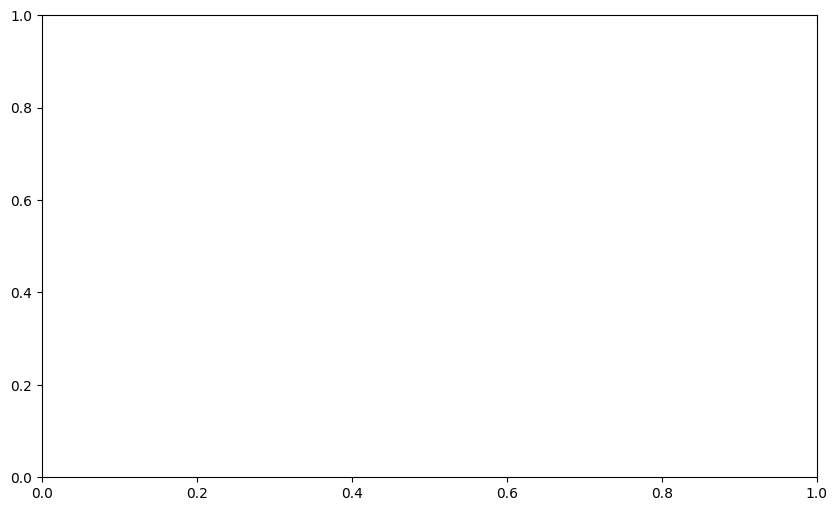

In [35]:
import matplotlib.pyplot as plt

# Select the columns for the number of constraints and solution times
constraints_column = 'MinimizeModel_IntVariables'
solution_times_columns = ['MinimizeTime_SolutionTime']
#solution_times_columns = ['MinimizeTime_SolutionTime', 'MaximizeNumberOfAcceptedOrders_SolutionTime']
# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the number of constraints vs solution times
for column in solution_times_columns:
    ax.plot(combined_aimms_results[constraints_column], combined_aimms_results[column], label=column)

# Set labels and legend
ax.set_xlabel('Number of Constraints')
ax.set_ylabel('Solution Time')
ax.legend()

# Add a title
plt.title('Number of Constraints vs Solution Time')

# Show the plot
plt.show()


KeyError: 'MinimizeTime_SolutionTime'

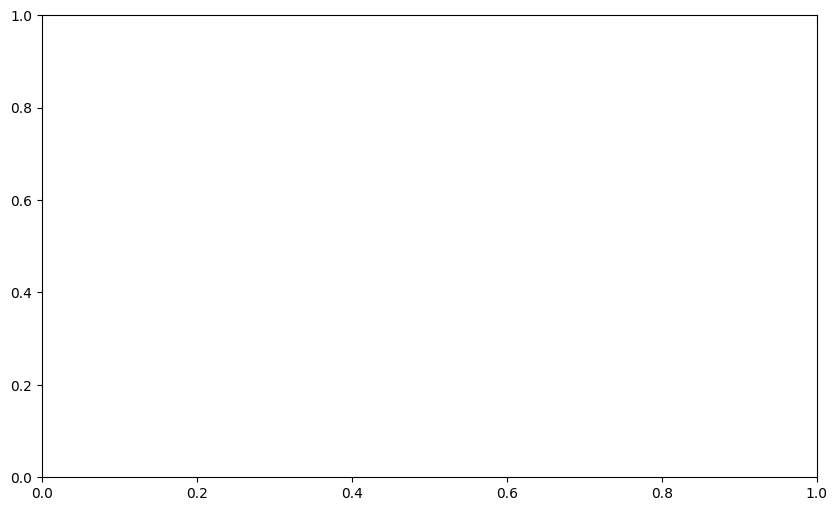

In [34]:
#plot MinimizeModel_Variables, MinimizeTime_SolutionTime, MaximizeNumberOfAcceptedOrders_SolutionTime, MaximizeModel_Variables, MaximizeModel_Constraints
import matplotlib.pyplot as plt
import numpy as np


time_columns = ['MinimizeTime_SolutionTime', 'MaximizeNumberOfAcceptedOrders_SolutionTime']
time_units = ['seconds', 'minutes']  # Define the units corresponding to each time column

# Select the columns for the number of columns
count_columns = ['MinimizeModel_Variables', 'MaximizeModel_Variables', 'MaximizeModel_Constraints']

# Create a figure
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot time indicators on the primary y-axis (ax1)
for column, unit in zip(time_columns, time_units):
    ax1.plot(combined_aimms_results.index, combined_aimms_results[column], label=f'{column} ({unit})')

# Set labels and legend for the primary y-axis
ax1.set_xlabel('Instance')
ax1.set_ylabel('Time', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

# Plot the number of columns on the secondary y-axis (ax2)
for column in count_columns:
    ax2.plot(combined_aimms_results.index, combined_aimms_results[column], label=f'{column}')

# Set labels and legend for the secondary y-axis
ax2.set_ylabel('Number of Columns', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend(loc='upper right')

# Add a common title
plt.title('Time and Number of Columns Plot')

# Show the plot
plt.show()